# This is the EDA for the Data set

## Objective
Find a model to predict SP500 price using BTC price.

### Input Data
Data is downloaded from investing.com

In [5]:
# !conda info

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/homebrew/Caskroom/miniconda/base/envs/finance-data-pipeline

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |         openblas          10 KB
    bottleneck-1.4.2           |  py311hb9f6ed7_0         127 KB
    libgfortran-5.0.0          |11_3_0_hca03da5_28         142 KB
    libgfortran5-11.3.0        |      h009349e_28         1.0 MB
    libopenblas-0.3.21         |       h269037a_0         3.3 MB
    llvm-openmp-14.0.6         |       hc6e5704_0         253 KB
    numexpr-2.10.1             |  py311h5d9532f_0         185 KB
    numpy-2.0.1                |  py311he598dae_1          12 KB
    numpy-base-2.0.1           |  py311hfbfe69c_1         7.1 MB
    pandas-2.2.3               |  py311hcf29cfe_0  

In [19]:

# Set display options for better visualization in Jupyter notebook
import pandas as pd
import numpy as np
import seaborn as sns

# Load Data sets

In [20]:
import numpy as np
print(np.__version__)

2.0.1


In [53]:
df_btc_usd = pd.read_csv("./input/data/20241223_Bitcoin Historical Data.csv")
df_sp500 = pd.read_csv("./input/data/20241223_S&P 500 Historical Data.csv")

In [22]:
df_btc_usd.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/23/2024,"95,998.0","95,184.8","96,487.5","93,751.2",110.55K,0.86%
1,12/22/2024,"95,183.8","97,281.6","97,422.2","94,265.2",100.64K,-2.13%
2,12/21/2024,"97,253.3","97,799.1","99,531.9","96,478.6",123.36K,-0.55%
3,12/20/2024,"97,795.7","97,468.3","98,178.2","92,301.9",221.18K,0.34%
4,12/19/2024,"97,466.1","100,190.5","102,778.8","95,672.2",200.57K,-2.73%


In [23]:
df_sp500.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/20/2024,"5,930.85","5,842.00","5,982.06","5,832.30",0.00K,1.09%
1,12/19/2024,"5,867.08","5,912.71","5,935.52","5,866.07",0.00K,-0.09%
2,12/18/2024,"5,872.16","6,047.65","6,070.67","5,867.79",0.00K,-2.95%
3,12/17/2024,"6,050.61","6,052.55","6,057.68","6,035.19",0.00K,-0.39%
4,12/16/2024,"6,074.08","6,063.79","6,085.19","6,059.14",0.00K,0.38%


In [54]:
from pandas import DataFrame

cols_to_keep = ['Price', 'Date']
# Filter cols
df_btc_usd = df_btc_usd[cols_to_keep]
df_sp500 = df_sp500[cols_to_keep]

def usd_to_float(df_usd_str: DataFrame, col_name: str) -> DataFrame:
    """
    Convert money str to float
    """
    return pd.to_numeric(df_usd_str[col_name].str.replace(',', ''), errors='coerce')


df_btc_usd['Price'] = usd_to_float(df_btc_usd, 'Price')
df_sp500['Price'] = usd_to_float(df_sp500, 'Price')

# Convert Date to DateTime 
df_btc_usd['Date'] = pd.to_datetime(df_btc_usd['Date'])
df_sp500['Date'] = pd.to_datetime(df_sp500['Date'])

# Assuming df1 and df2 are your DataFrames
print("df_btc_usd:")
print(df_btc_usd.dtypes)
print(df_btc_usd.head())

print("df_sp500:")
print(df_sp500.dtypes)
print(df_sp500.head())


df_btc_usd:
Price           float64
Date     datetime64[ns]
dtype: object
     Price       Date
0  95998.0 2024-12-23
1  95183.8 2024-12-22
2  97253.3 2024-12-21
3  97795.7 2024-12-20
4  97466.1 2024-12-19
df_sp500:
Price           float64
Date     datetime64[ns]
dtype: object
     Price       Date
0  5930.85 2024-12-20
1  5867.08 2024-12-19
2  5872.16 2024-12-18
3  6050.61 2024-12-17
4  6074.08 2024-12-16


In [74]:
# Join data by date
df_sp500.rename(columns={'Price': 'sp500_price'}, inplace=True)
df_btc_usd.rename(columns={'Price': 'btc_price'}, inplace=True)

df_btc_sp500 = pd.merge(df_btc_usd, df_sp500, on='Date', how='inner')
df_btc_sp500 = df_btc_sp500.sort_values(by='Date', ascending=True)
df_btc_sp500.head()

,btc_price,Date,sp500_price
1251,6967.0,2020-01-02,3257.8
1250,7343.1,2020-01-03,3234.8
1249,7759.1,2020-01-06,3246.3
1248,8155.7,2020-01-07,3237.2
1247,8059.6,2020-01-08,3253.1


## Plot

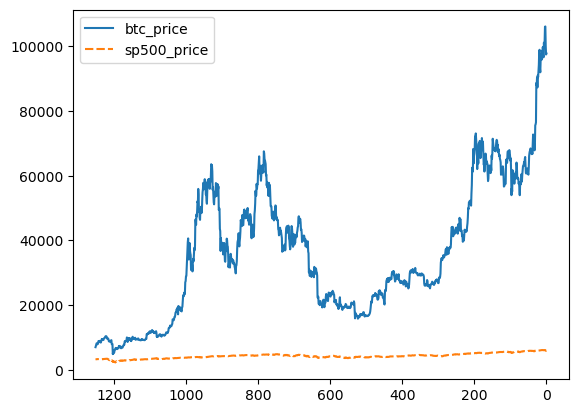

In [81]:
import matplotlib.pyplot as plt
                   
sns.lineplot(data=df_btc_sp500) 
plt.gca().invert_xaxis()  # This line reverses the x-axis
plt.show()

#plt.xlabel("Time") 
#plt.ylabel("Value") 
# plt.title("Comparison of Time Series")
# plt.show()

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler_btc = MinMaxScaler()
scaler_sp500 = MinMaxScaler()
df_btc_sp500['btc_price'] = pd.DataFrame(scaler_btc.fit_transform(df_btc_sp500['btc_price']), columns=['btc_price'])
df_btc_sp500['sp500_price'] = pd.DataFrame(scaler_sp500.fit_transform(df_btc_sp500['sp500_price']), columns=['sp500_price'])

                   
sns.lineplot(data=df_btc_sp500) 
plt.gca().invert_xaxis()  # This line reverses the x-axis
plt.show()

3.9.2
